# Data Analysis

In [1]:
%matplotlib inline
import pandas as pd
import os
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import .csv file 

In [8]:
df = pd.read_csv('../price_mango.csv', index_col=0, parse_dates=True, low_memory=False)
df.replace(to_replace='NR', value=np.nan, inplace=True)
df.iloc[:5, :5]

,Tirupati_Andh,Mapusa_Goa,"Ahmedabad(Fruit Market, Naroda)_Guja",Bharuch_Guja,Dahod(Veg. Market)_Guja
2008-01-01,NaN,NaN,NaN,NaN,NaN
2008-01-02,NaN,NaN,NaN,NaN,NaN
2008-01-03,NaN,NaN,NaN,NaN,NaN
2008-01-04,NaN,NaN,NaN,NaN,NaN
2008-01-05,NaN,NaN,NaN,NaN,NaN


In [9]:
df.fillna(0, inplace=True)
df = df.astype('float64')
df.iloc[:5, :5]

,Tirupati_Andh,Mapusa_Goa,"Ahmedabad(Fruit Market, Naroda)_Guja",Bharuch_Guja,Dahod(Veg. Market)_Guja
2008-01-01,0.0,0.0,0.0,0.0,0.0
2008-01-02,0.0,0.0,0.0,0.0,0.0
2008-01-03,0.0,0.0,0.0,0.0,0.0
2008-01-04,0.0,0.0,0.0,0.0,0.0
2008-01-05,0.0,0.0,0.0,0.0,0.0


## Heatmap for the entire dataset

In [10]:
# plot 1/5 markets
heat_df = df.iloc[::15, ::5]
heat_df.index = heat_df.index.astype('str')
print(heat_df.columns)

Index(['Tirupati_Andh', 'Deesa(Deesa Veg Yard)_Guja', 'Talalagir_Guja',
       'Asandh_Hary', 'Ch. Dadri_Hary', 'Gohana_Hary', 'Jind_Hary',
       'Naraingarh_Hary', 'Radaur_Hary', 'Uklana_Hary',
       ...
       'Jabalpur(F&V)_Madh', 'Maddur_Karn', 'Karwar_Karn', 'Bhadravathi_Karn',
       'Agra_Uttr', 'Haathras_Uttr', 'Meerut_Uttr', 'Nanjangud_Karn',
       'Dhar(F&V)_Madh', 'Dharamshala_Hima'],
      dtype='object', length=170)


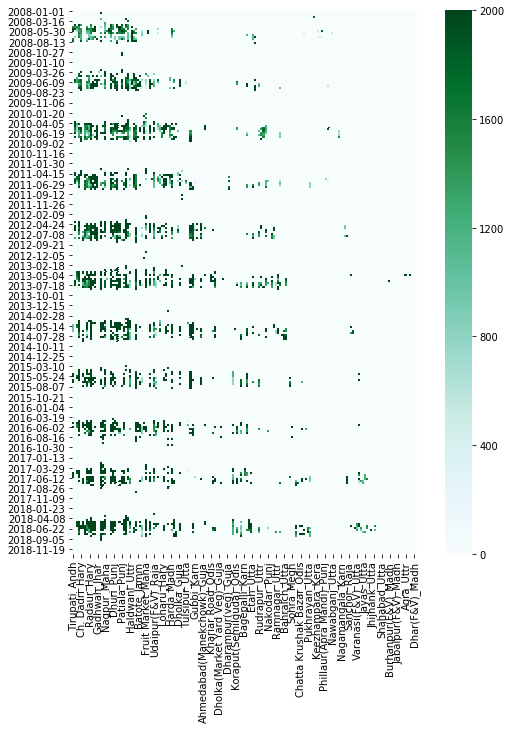

In [11]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(heat_df, vmin=0, vmax=2000, cmap="BuGn", square=True)

## Data Distribution

4018


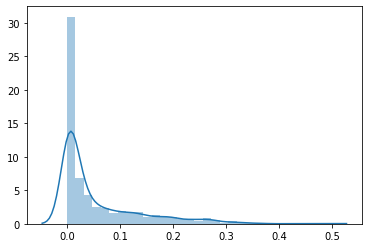

In [12]:
count_cols = []
days = len(df.index)
print(days)
for col in df.columns:
    count_cols.append(len(list(np.where(df[col] != 0.0)[0])) / days)

sns.distplot(np.array(count_cols))

## Drop columns with less than 0.1 Frequency

In [48]:
truncated_df = df
drop_list = []

for col in truncated_df.columns:
    if len(list(np.where(truncated_df[col] != 0.0)[0])) / 4000 < 0.1:
        drop_list.append(col)

truncated_df = truncated_df.drop(columns=drop_list)
truncated_df

,Kovvur_Andh,Nuzvid_Andh,Palamaner_Andh,Vijayawada_Andh,Cachar_Assa,Golaghat_Assa,Howly_Assa,Kharupetia_Assa,Lanka_Assa,P.O. Uparhali Guwahati_Assa,...,Purulia_West,Ramkrishanpur(Howrah)_West,Ranaghat_West,Sainthia_West,Samsi_West,Sealdah Koley Market_West,Sheoraphuly_West,Tamluk (Medinipur E)_West,Toofanganj_West,Uluberia_West
2008-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0,0.0,0.0,...,875.0,1250.0,0.0,0.0,0.0,0.0,900.0,1200.0,0.0,0.0
2008-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0,750.0,1350.0,...,900.0,1350.0,0.0,0.0,0.0,0.0,700.0,1200.0,0.0,0.0
2008-01-03,0.0,0.0,0.0,0.0,800.0,0.0,0.0,400.0,0.0,0.0,...,900.0,0.0,0.0,0.0,0.0,0.0,700.0,1200.0,0.0,0.0
2008-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0,0.0,0.0,...,900.0,0.0,0.0,0.0,0.0,0.0,850.0,0.0,0.0,0.0
2008-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0,0.0,1300.0,...,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,900.0,0.0,0.0,0.0
2008-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,900.0,0.0,0.0,0.0,0.0,0.0,800.0,900.0,0.0,0.0
2008-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,825.0,...,900.0,1300.0,0.0,0.0,0.0,0.0,750.0,900.0,0.0,0.0
2008-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1050.0,...,875.0,1325.0,0.0,0.0,0.0,0.0,700.0,900.0,0.0,0.0
2008-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0,0.0,...,850.0,0.0,0.0,0.0,0.0,0.0,700.0,0.0,0.0,0.0


## Calculate the Correlation matrix for Remaining Dataset

In [49]:
corr = truncated_df.corr(method='pearson')

In [50]:
corr.fillna(0, inplace=True)
corr[:5]

,Kovvur_Andh,Nuzvid_Andh,Palamaner_Andh,Vijayawada_Andh,Cachar_Assa,Golaghat_Assa,Howly_Assa,Kharupetia_Assa,Lanka_Assa,P.O. Uparhali Guwahati_Assa,...,Purulia_West,Ramkrishanpur(Howrah)_West,Ranaghat_West,Sainthia_West,Samsi_West,Sealdah Koley Market_West,Sheoraphuly_West,Tamluk (Medinipur E)_West,Toofanganj_West,Uluberia_West
Kovvur_Andh,1.000000,-0.050865,-0.228387,0.375295,-0.024306,0.185310,0.152130,0.124917,0.074340,-0.027547,...,0.100622,0.084643,-0.041003,0.085675,0.186488,0.142980,-0.118879,0.057127,0.135811,0.119967
Nuzvid_Andh,-0.050865,1.000000,0.138260,-0.016813,0.145098,-0.112256,-0.150659,-0.071647,-0.021851,0.015678,...,-0.043306,0.054342,-0.166383,-0.168510,-0.053965,-0.146795,0.344388,-0.062041,-0.225323,-0.196631
Palamaner_Andh,-0.228387,0.138260,1.000000,-0.083653,-0.074193,0.025031,0.118367,0.187530,0.032302,-0.140245,...,0.082969,0.225378,0.314008,0.191493,-0.125586,0.033169,0.034000,0.112199,0.140195,0.214159
Vijayawada_Andh,0.375295,-0.016813,-0.083653,1.000000,0.049122,0.257695,0.180006,0.254807,0.160736,0.033950,...,0.100779,0.015942,0.012498,0.109291,0.189902,0.185536,-0.192227,0.102109,0.213172,0.155001
Cachar_Assa,-0.024306,0.145098,-0.074193,0.049122,1.000000,-0.085846,-0.097200,0.042656,0.015166,0.520324,...,0.016058,-0.145218,-0.275072,-0.278589,0.004254,0.046666,0.228120,-0.180627,-0.086998,-0.325079


## Correlation Heatmap

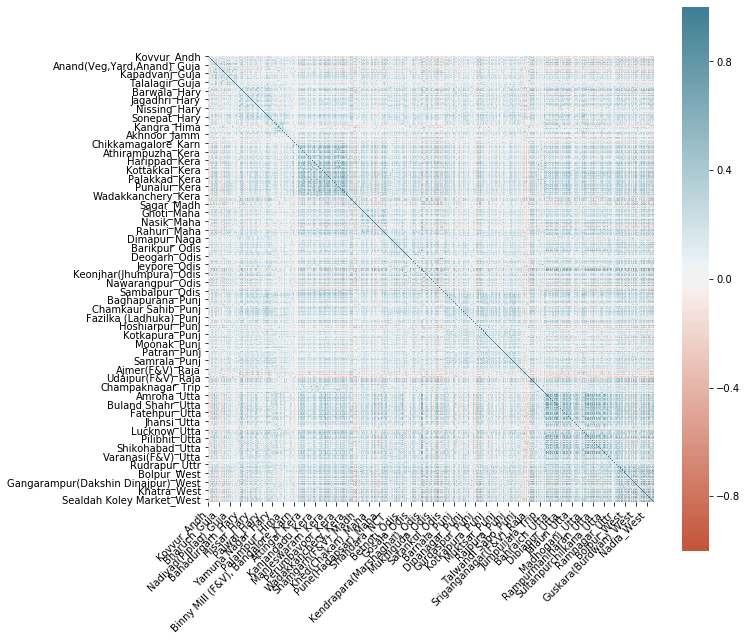

In [51]:
plt.figure(figsize=(10,10)) 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);